In [11]:
# linear regression prediction with prediction interval
from numpy.random import randn
from numpy.random import seed
from numpy import power
from numpy import sqrt
from numpy import mean
from numpy import std
from numpy import sum as arraysum
from scipy.stats import linregress
from matplotlib import pyplot
import pandas as pd
import numpy as np

In [2]:
data =  pd.read_csv("D:\\Github\\Capstone-project\\Data folder\\player_performances.csv")

#kp_conf_rat =  pd.read_csv("D:\\Github\\Capstone-project\\Data folder\\KP_Conf_Ratings.csv")

In [3]:
data.head(2)

,Player.Name,season,season_copy,player_name_Cal,year,defence_def_rtg,offence,defensive_score,offensive_score,player_name,offensive_ranking,defensive_ranking
0,zach-edey-1,2021-22,2021,zach-edey-1_2021,22,3018.74,1181.18,3009.0586,976.78186,zach-edey-1_2021-22,0,18
1,luka-garza-1,2019-20,2019,luka-garza-1_2019,20,2274.60,1079.56,2616.9224,970.78503,luka-garza-1_2019-20,1,147


In [4]:
y_def  = data['defence_def_rtg'] 
y_def_pred = data['defensive_score'] 

In [6]:
print(y_def.shape)
print(y_def_pred.shape)

(7715,)
(7715,)


In [7]:
# fit linear regression model
#b1, b0, r_value, p_value, std_err = linregress(x, y)

In [8]:
y = y_def
yhat = y_def_pred

y_out = y[0]
yhat_out = yhat[0]

# estimate stdev of yhat

sum_errs = arraysum((y - yhat)**2) 
stdev = sqrt(1/(len(y)-2) * sum_errs)  

# calculate prediction interval
interval = 1.96 * stdev
print('Prediction Interval: %.3f' % interval)
lower, upper = yhat_out - interval, yhat_out + interval
print('95%% likelihood that the true value is between %.3f and %.3f' % (lower, upper))
print('True value: %.3f' % y_out)
print('Predicted value: %.3f' % yhat_out)



Prediction Interval: 538.251
95% likelihood that the true value is between 2470.808 and 3547.309
True value: 3018.740
Predicted value: 3009.059


In [ ]:
# plot dataset and prediction with interval
#pyplot.scatter(x, y)
#pyplot.plot(x, yhat, color='red')
#pyplot.errorbar(x_in, yhat_out, yerr=interval, color='black', fmt='o')
#pyplot.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

'\n# Print out statistics\nmae_test = mean_absolute_error(y_test, y_test_pred)\nprint(f"MAE: {mae_test:.3f}")\nprint(f"Width of 95% prediction interval: {np.mean(y_err) * 2:3f}")\ncoverage = regression_coverage_score(\n    y_test, y_test_pred - std * 1.96, y_test_pred + std * 1.96\n)\nprint(f"Coverage: {coverage:.3f}")\n'

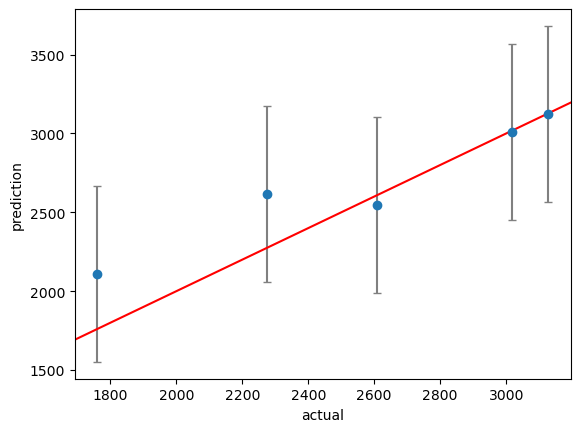

In [50]:
import matplotlib.pyplot as plt
#from mapie.metrics import regression_coverage_score

# Fit the scikit-learn model
#est = LinearRegression()
#est.fit(X_train, y_train)
#y_train_pred = est.predict(X_train)
#y_test_pred = est.predict(X_test)

y_train = y_def.iloc[0:5]
y_train_pred = y_def_pred.iloc[0:5]

# Compute prediction intervals
sum_of_squares = np.sum((y_train - y_train_pred) ** 2)
std = np.sqrt(1 / (len(y_train) - 2) * sum_of_squares)

# Plot the prediction intervals
y_err = np.vstack([std, std]) * 1.96
plt.errorbar(y_train, y_train_pred, yerr=y_err, fmt="o", ecolor="grey", capsize=3)
plt.plot(plt.xlim(), plt.xlim(), color="red", scalex=False, scaley=False)
plt.xlabel("actual")
plt.ylabel("prediction")

'''
# Print out statistics
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f"MAE: {mae_test:.3f}")
print(f"Width of 95% prediction interval: {np.mean(y_err) * 2:3f}")
coverage = regression_coverage_score(
    y_test, y_test_pred - std * 1.96, y_test_pred + std * 1.96
)
print(f"Coverage: {coverage:.3f}")
'''

In [40]:
y_err[0][0]

682.4847873302158

In [24]:
data['defensive_score_UL']  = data['defensive_score'] + y_err[0][0]

data['defensive_score_LL']  =  data['defensive_score'] -y_err[0][0]

In [39]:
data[['player_name_Cal','defence_def_rtg', 'defensive_score', 'defensive_score_UL', 'defensive_score_LL']].iloc[0:3]

,player_name_Cal,defence_def_rtg,defensive_score,defensive_score_UL,defensive_score_LL
0,zach-edey-1_2021,3018.74,3009.0586,3547.309311,2470.807889
1,luka-garza-1_2019,2274.60,2616.9224,3155.173111,2078.671689
2,xavier-tillman-1_2018,2608.50,2545.4966,3083.747311,2007.245889


In [42]:
y_off  = data['offence'] 
y_off_pred = data['offensive_score'] 

In [7]:
# fit linear regression model
#b1, b0, r_value, p_value, std_err = linregress(x, y)

In [43]:
y = y_off
yhat = y_off_pred

y_out = y[0]
yhat_out = yhat[0]

# estimate stdev of yhat

sum_errs = arraysum((y - yhat)**2) 
stdev = sqrt(1/(len(y)-2) * sum_errs)  

# calculate prediction interval
interval = 1.96 * stdev
print('Prediction Interval: %.3f' % interval)
lower, upper = yhat_out - interval, yhat_out + interval
print('95%% likelihood that the true value is between %.3f and %.3f' % (lower, upper))
print('True value: %.3f' % y_out)
print('Predicted value: %.3f' % yhat_out)



Prediction Interval: 250.476
95% likelihood that the true value is between 726.306 and 1227.258
True value: 1181.180
Predicted value: 976.782


In [ ]:
# plot dataset and prediction with interval
#pyplot.scatter(x, y)
#pyplot.plot(x, yhat, color='red')
#pyplot.errorbar(x_in, yhat_out, yerr=interval, color='black', fmt='o')
#pyplot.show()

In [45]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

'\n# Print out statistics\nmae_test = mean_absolute_error(y_test, y_test_pred)\nprint(f"MAE: {mae_test:.3f}")\nprint(f"Width of 95% prediction interval: {np.mean(y_err) * 2:3f}")\ncoverage = regression_coverage_score(\n    y_test, y_test_pred - std * 1.96, y_test_pred + std * 1.96\n)\nprint(f"Coverage: {coverage:.3f}")\n'

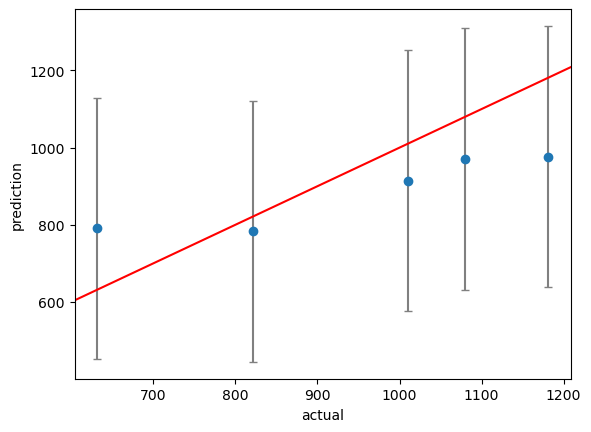

In [59]:
import matplotlib.pyplot as plt
#from mapie.metrics import regression_coverage_score

# Fit the scikit-learn model
#est = LinearRegression()
#est.fit(X_train, y_train)
#y_train_pred = est.predict(X_train)
#y_test_pred = est.predict(X_test)

y_train = y_off.iloc[0:5]
y_train_pred = y_off_pred.iloc[0:5]

# Compute prediction intervals
sum_of_squares = np.sum((y_train - y_train_pred) ** 2)
std = np.sqrt(1 / (len(y_train) - 2) * sum_of_squares)

# Plot the prediction intervals
y_err = np.vstack([std, std]) * 1.96
plt.errorbar(y_train, y_train_pred, yerr=y_err, fmt="o", ecolor="grey", capsize=3)
plt.plot(plt.xlim(), plt.xlim(), color="red", scalex=False, scaley=False)
plt.xlabel("actual")
plt.ylabel("prediction")

'''
# Print out statistics
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f"MAE: {mae_test:.3f}")
print(f"Width of 95% prediction interval: {np.mean(y_err) * 2:3f}")
coverage = regression_coverage_score(
    y_test, y_test_pred - std * 1.96, y_test_pred + std * 1.96
)
print(f"Coverage: {coverage:.3f}")
'''

In [55]:
y_err[0][0]

250.47634501274337

In [57]:
data['offensive_score_UL']  = data['offensive_score'] + y_err[0][0]

data['offensive_score_LL']  =  data['offensive_score'] -y_err[0][0]

In [58]:
data[['player_name_Cal','defence_def_rtg', 'defensive_score', 'defensive_score_UL',
      'defensive_score_LL', 'offence', 'offensive_score', 'offensive_score_UL',
      'offensive_score_LL' ]].iloc[0:5]

,player_name_Cal,defence_def_rtg,defensive_score,defensive_score_UL,defensive_score_LL,offence,offensive_score,offensive_score_UL,offensive_score_LL
0,zach-edey-1_2021,3018.74,3009.0586,3547.309311,2470.807889,1181.18,976.78186,1227.258205,726.305515
1,luka-garza-1_2019,2274.60,2616.9224,3155.173111,2078.671689,1079.56,970.78503,1221.261375,720.308685
2,xavier-tillman-1_2018,2608.50,2545.4966,3083.747311,2007.245889,1010.52,914.29694,1164.773285,663.820595
3,drew-timme-1_2020,1760.67,2109.6152,2647.865911,1571.364489,631.80,790.72974,1041.206085,540.253395
4,oscar-tshiebwe-1_2021,3127.34,3123.5452,3661.795911,2585.294489,821.10,783.17770,1033.654045,532.701355
